In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import bambi as bmb
import arviz as az

In [47]:
df = pd.read_excel('statistics.xlsx')
df

,t1,t2,hits,genre1,genre2,subgenre1,subgenre2,date1,date2,author1,author2
0,Alexanders geesten,Alexiuslegende,0.000000,Epiek,Epiek,Ridder,Heiligenleven,1400.0,1295.5,Jacob van Maerlant,NaN
1,Alexanders geesten,Anatomie van de mens,0.000903,Epiek,Epiek,Ridder,Didactiek,1400.0,1375.0,Jacob van Maerlant,NaN
2,Alexanders geesten,Arturs doet,0.040564,Epiek,Epiek,Ridder,Arthur,1400.0,1325.0,Jacob van Maerlant,NaN
3,Alexanders geesten,Aubri de Borgengoen,0.008172,Epiek,Epiek,Ridder,Karel,1400.0,1350.0,Jacob van Maerlant,NaN
4,Alexanders geesten,Barlaam en Josaphat,0.001806,Epiek,Epiek,Ridder,Ridder,1400.0,1387.5,Jacob van Maerlant,NaN
...,...,...,...,...,...,...,...,...,...,...,...
25755,Merlijn-continuatie,Walewein,0.035389,Epiek,Epiek,Arthur,Arthur,1425.0,1350.0,Lodewijk van Velthem,Penninc en Pieter Vostaert
25756,Merlijn-continuatie,Walewein ende Keye,0.051769,Epiek,Epiek,Arthur,Arthur,1425.0,1325.0,Lodewijk van Velthem,NaN
25757,Merlijn-continuatie,Willem van Oringen,0.004553,Epiek,Epiek,Arthur,Karel,1425.0,1325.0,Lodewijk van Velthem,Clays van Haerlem
25758,Merlijn-continuatie,Wisselau,0.008085,Epiek,Epiek,Arthur,Karel,1425.0,1295.5,Lodewijk van Velthem,NaN


In [48]:
df.sort_values('hits', ascending=False).head(100)

,t1,t2,hits,genre1,genre2,subgenre1,subgenre2,date1,date2,author1,author2
11992,Limburgse Aiol,Vlaamse Aiol,0.500000,Epiek,Epiek,Karel,Karel,1230.0,1350.0,NaN,NaN
24554,Vlaamse Aiol,Limburgse Aiol,0.500000,Epiek,Epiek,Karel,Karel,1350.0,1230.0,NaN,NaN
13583,Noch meer van wiven,Van der wive wonderlijcheit (lange versie),0.300595,Epiek,Epiek,Didactiek,Didactiek,1400.0,1375.0,NaN,NaN
23124,Van der wive wonderlijcheit (lange versie),Noch meer van wiven,0.300595,Epiek,Epiek,Didactiek,Didactiek,1375.0,1400.0,NaN,NaN
20338,Spiegel historiael (P1-P4 [Maerlant]),Brabantsche yeesten (B1-5),0.159354,Epiek,Epiek,Historiografie,Historiografie,1312.5,1470.0,Jacob van Maerlant,Jan van Boendale
...,...,...,...,...,...,...,...,...,...,...,...
12375,Luiks Diatessaron,Gwidekijn van Sassen,0.063600,Epiek,Epiek,Religie,Karel,1295.5,1350.0,NaN,NaN
2981,Brabantsche yeesten (B1-5),Rijmbijbel,0.063291,Epiek,Epiek,Historiografie,Religie,1470.0,1285.0,Jan van Boendale,NaN
2907,Brabantsche yeesten (B1-5),Der leken spieghel,0.063253,Epiek,Epiek,Historiografie,Didactiek,1470.0,1350.0,Jan van Boendale,Jan van Boendale
3336,Brabantsche yeesten (B7),Van den derden Eduwaert,0.063103,Epiek,Epiek,Historiografie,Historiografie,1470.0,1445.0,NaN,Jan van Boendale


In [49]:
df['subgenre'] = df['subgenre1'] == df['subgenre2']
df['author'] = df['author1'] == df['author2']
df['date'] = df['date1'] - df['date2']
df

,t1,t2,hits,genre1,genre2,subgenre1,subgenre2,date1,date2,author1,author2,subgenre,author,date
0,Alexanders geesten,Alexiuslegende,0.000000,Epiek,Epiek,Ridder,Heiligenleven,1400.0,1295.5,Jacob van Maerlant,NaN,False,False,104.5
1,Alexanders geesten,Anatomie van de mens,0.000903,Epiek,Epiek,Ridder,Didactiek,1400.0,1375.0,Jacob van Maerlant,NaN,False,False,25.0
2,Alexanders geesten,Arturs doet,0.040564,Epiek,Epiek,Ridder,Arthur,1400.0,1325.0,Jacob van Maerlant,NaN,False,False,75.0
3,Alexanders geesten,Aubri de Borgengoen,0.008172,Epiek,Epiek,Ridder,Karel,1400.0,1350.0,Jacob van Maerlant,NaN,False,False,50.0
4,Alexanders geesten,Barlaam en Josaphat,0.001806,Epiek,Epiek,Ridder,Ridder,1400.0,1387.5,Jacob van Maerlant,NaN,True,False,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25755,Merlijn-continuatie,Walewein,0.035389,Epiek,Epiek,Arthur,Arthur,1425.0,1350.0,Lodewijk van Velthem,Penninc en Pieter Vostaert,True,False,75.0
25756,Merlijn-continuatie,Walewein ende Keye,0.051769,Epiek,Epiek,Arthur,Arthur,1425.0,1325.0,Lodewijk van Velthem,NaN,True,False,100.0
25757,Merlijn-continuatie,Willem van Oringen,0.004553,Epiek,Epiek,Arthur,Karel,1425.0,1325.0,Lodewijk van Velthem,Clays van Haerlem,False,False,100.0
25758,Merlijn-continuatie,Wisselau,0.008085,Epiek,Epiek,Arthur,Karel,1425.0,1295.5,Lodewijk van Velthem,NaN,False,False,129.5


In [50]:
df['author'].value_counts()

False    25672
True        88
Name: author, dtype: int64

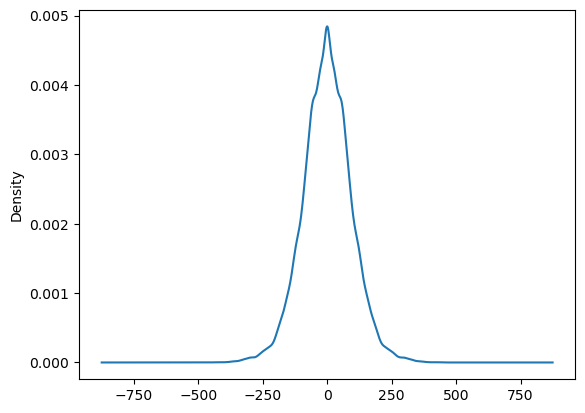

In [51]:
df['date'].plot.kde();

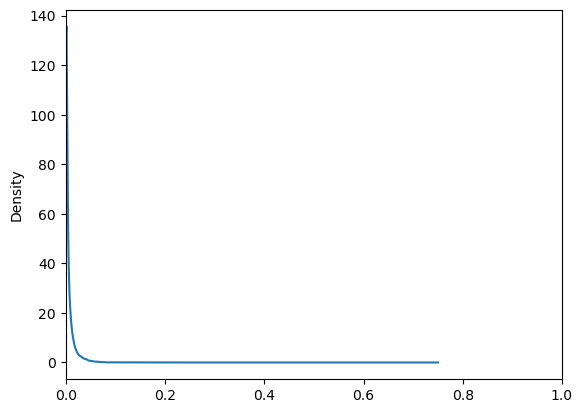

In [52]:
df['hits'].plot.kde()
plt.xlim(0, 1);

In [53]:
df['subgenre'] = df['subgenre'].astype('category')
df['author'] = df['author'].astype('category')

In [54]:
df['subgenre'].value_counts()

False    21920
True      3840
Name: subgenre, dtype: int64

In [55]:
print(len(df))
df = df[~df.isna()]
print(len(df))

25760
25760


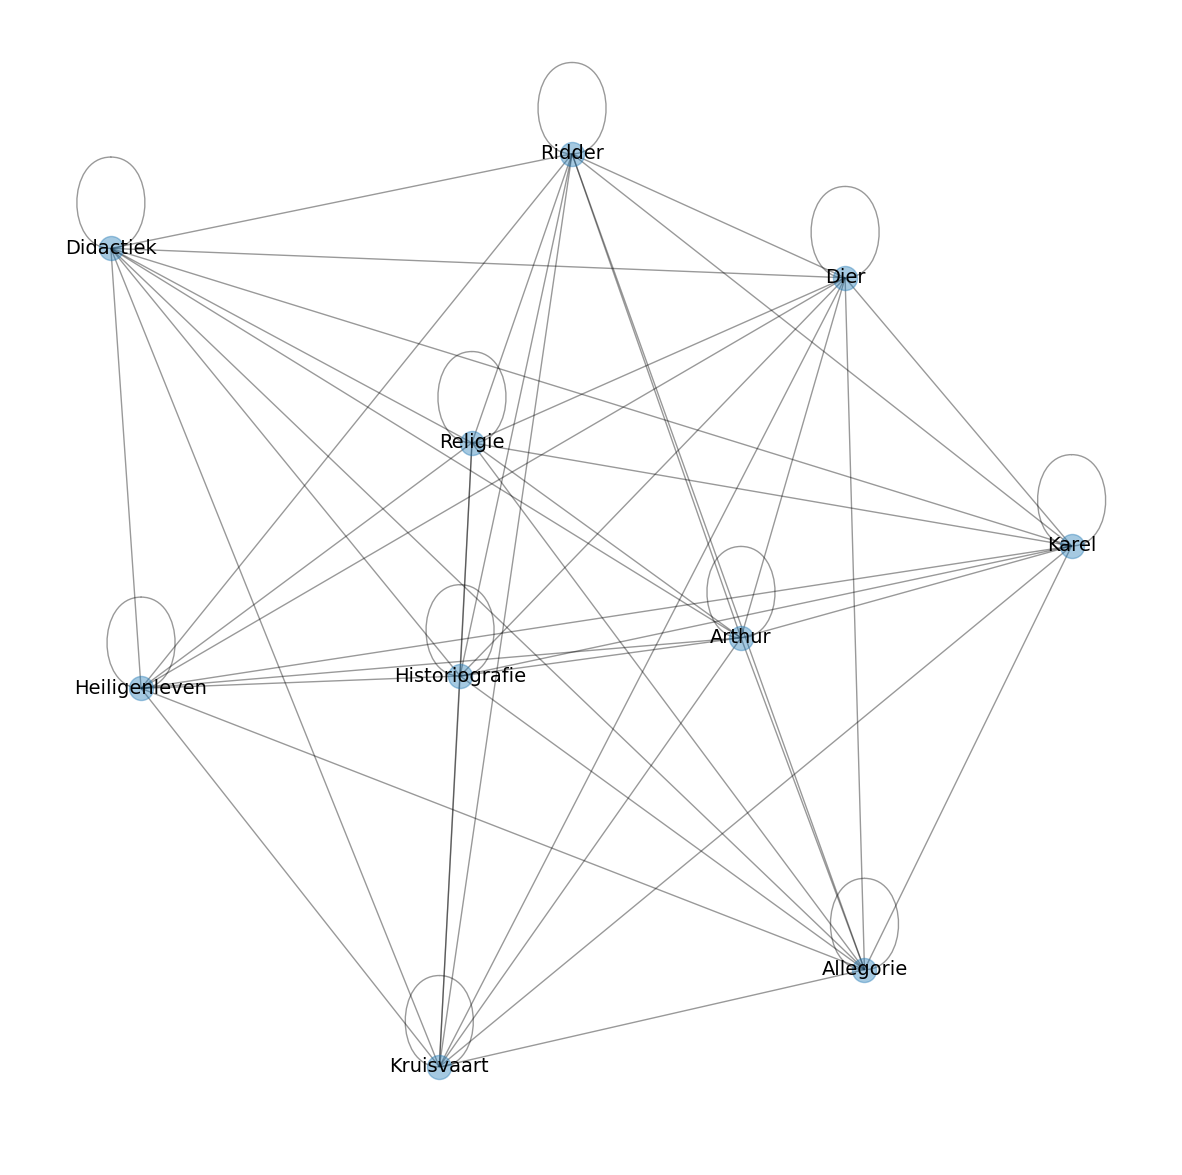

In [57]:
import networkx as nx

intergenre = df.groupby(['subgenre1', 'subgenre2'])['hits'].mean().reset_index().rename_axis(None, axis=1)
intergenre.columns = ('source', 'target', 'weight')

G = nx.from_pandas_edgelist(intergenre, edge_attr='weight')
#nodesizes = [intergenre['weight'] * 10 for speaker in G]

fig = plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.5, iterations=200)
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(G, pos, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=14)
plt.axis('off');

In [11]:
intergenre['target'] += '(trg)'
intergenre['source'] += '(src)'
intergenre

from d3blocks import D3Blocks
d3 = D3Blocks()
d3.sankey(intergenre, showfig=True, overwrite=True)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Sankey]
[d3blocks] >INFO> filepath is set to [/var/folders/kd/w0jjczk911x4pdd7pf2hx6g40000gn/T/d3blocks/sankey.html]
[d3blocks] >INFO> Convert to Frame.
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/kd/w0jjczk911x4pdd7pf2hx6g40000gn/T/d3blocks/sankey.html]
[d3blocks] >INFO> File not found: [file:////var/folders/kd/w0jjczk911x4pdd7pf2hx6g40000gn/T/d3blocks/sankey.html]
[d3blocks] >INFO> Open browser: file:////var/folders/kd/w0jjczk911x4pdd7pf2hx6g40000gn/T/d3blocks/sankey.html


Auto-assigning NUTS sampler...
[d3blocks] >INFO> Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
[d3blocks] >INFO> Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
[d3blocks] >INFO> Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, author, date, subgenre, hits_sigma]
[d3blocks] >INFO> NUTS: [Intercept, author, date, subgenre, hits_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
[d3blocks] >INFO> Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
[d3blocks] >INFO> finding looplift candidates


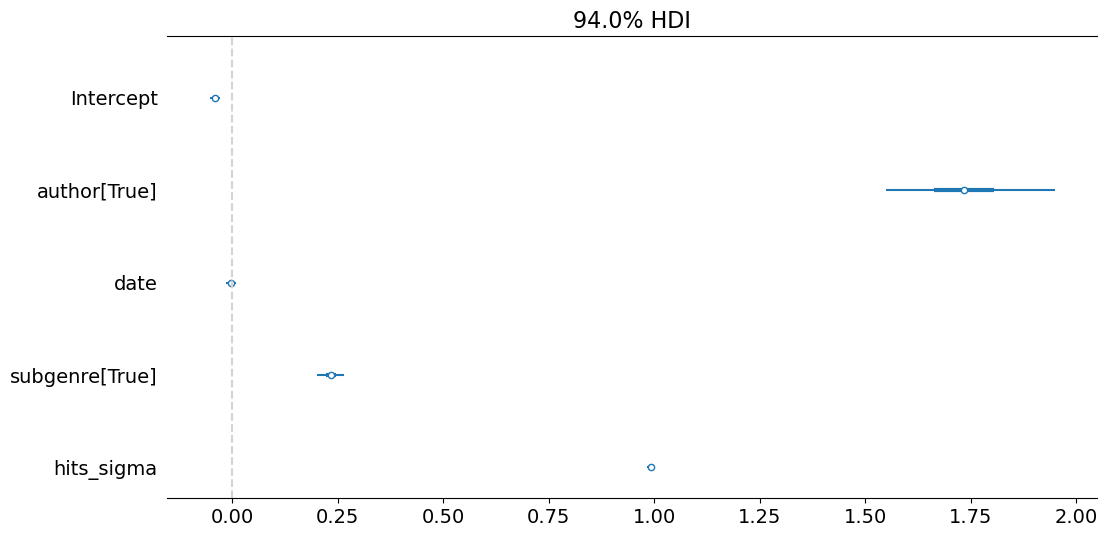

In [12]:
df['date'] = scale(df['date'])
df['hits'] = scale(df['hits'])
model = bmb.Model('hits ~ author + date + subgenre', df)
fit = model.fit(draws=1000, chains=4)
az.summary(fit)
az.plot_forest(fit, combined=True, figsize=(12, 6))
plt.axvline(0, c='lightgrey', ls='--');

Auto-assigning NUTS sampler...
[d3blocks] >INFO> Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
[d3blocks] >INFO> Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
[d3blocks] >INFO> Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, author, date, subgenre1, hits_sigma]
[d3blocks] >INFO> NUTS: [Intercept, author, date, subgenre1, hits_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 127 seconds.
[d3blocks] >INFO> Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 127 seconds.
[d3blocks] >INFO> finding looplift candidates


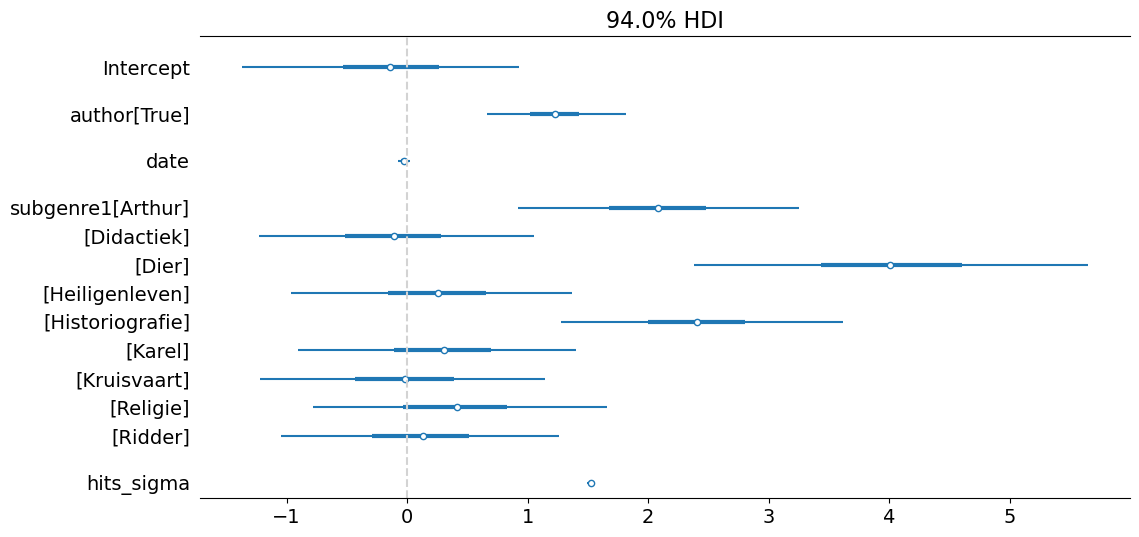

In [13]:
df_match = df[df['subgenre'] == True]
model = bmb.Model('hits ~ author + date + subgenre1', df_match)
fit = model.fit(draws=1000, chains=4)
az.summary(fit)
az.plot_forest(fit, combined=True, figsize=(12, 6))
plt.axvline(0, c='lightgrey', ls='--');

NodeView(('Allegorie(src)', 'Allegorie(trg)', 'Arthur(trg)', 'Didactiek(trg)', 'Dier(trg)', 'Heiligenleven(trg)', 'Historiografie(trg)', 'Karel(trg)', 'Kruisvaart(trg)', 'Religie(trg)', 'Ridder(trg)', 'Arthur(src)', 'Didactiek(src)', 'Dier(src)', 'Heiligenleven(src)', 'Historiografie(src)', 'Karel(src)', 'Kruisvaart(src)', 'Religie(src)', 'Ridder(src)'))